In [1]:
import os
import yfinance as yf
import pandas as pd

# Define the cryptocurrencies and their corresponding tickers on Yahoo Finance
crypto_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Tether': 'USDT-USD',
    'XRP': 'XRP-USD',
    'BNB': 'BNB-USD',
    'Solana': 'SOL-USD',
    'Dogecoin': 'DOGE-USD',
    'USD Coin': 'USDC-USD',
    'TRON': 'TRX-USD',
    'Cardano': 'ADA-USD'
}

# Define individual start dates for each cryptocurrency
crypto_start_dates = {
    'Bitcoin': '2010-07-13',
    'Ethereum': '2015-08-07',
    'Tether': '2015-02-25',
    'XRP': '2013-08-04',
    'BNB': '2017-07-25',
    'Solana': '2020-01-01',
    'Dogecoin': '2013-01-01',
    'USD Coin': '2018-10-08',
    'TRON': '2017-09-13',
    'Cardano': '2017-10-01'
}

# Set a common end date for all downloads
end_date = "2025-04-16"  # Adjust as needed

# Create a directory named 'data' if it doesn't exist
os.makedirs('data', exist_ok=True)

# Dictionary to store each crypto's data
crypto_data = {}

# Download, clean, and save the data to CSV files in the "data" folder
for crypto, ticker in crypto_tickers.items():
    start_date = crypto_start_dates.get(crypto, '2018-01-01')
    print(
        f"Downloading data for {crypto} ({ticker}) from {start_date} to {end_date}...")

    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print(f"Warning: No data retrieved for {crypto} ({ticker}).")
    else:
        # If the DataFrame has multi-level columns, get the first level as the header
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)

        # Store the data in the crypto_data dictionary
        crypto_data[crypto] = data

        # Save the DataFrame to a CSV file inside the 'data' folder
        csv_filename = os.path.join(
            "data", f"{crypto.replace(' ', '_')}_data.csv")
        data.to_csv(csv_filename)
        print(f"Data for {crypto} saved to {csv_filename}.")

# Display a snippet from Bitcoin's data to verify the output
print("\nSample data for Bitcoin:")
print(crypto_data.get('Bitcoin', pd.DataFrame()).head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for Bitcoin saved to data\Bitcoin_data.csv.
Data for Ethereum saved to data\Ethereum_data.csv.


[*********************100%***********************]  1 of 1 completed


Data for Tether saved to data\Tether_data.csv.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for XRP saved to data\XRP_data.csv.
Data for BNB saved to data\BNB_data.csv.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for Solana saved to data\Solana_data.csv.
Data for Dogecoin saved to data\Dogecoin_data.csv.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for USD Coin saved to data\USD_Coin_data.csv.
Data for TRON saved to data\TRON_data.csv.


[*********************100%***********************]  1 of 1 completed

Data for Cardano saved to data\Cardano_data.csv.

Sample data for Bitcoin:
Price            Close        High         Low        Open    Volume
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


Bitcoin Data (First 5 Rows):
                 Close        High         Low        Open    Volume
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100

Bitcoin Data Summary Statistics:
               Close           High            Low           Open  \
count    3864.000000    3864.000000    3864.000000    3864.000000   
mean    21548.429355   22006.290356   21023.704948   21528.073261   
std     24817.517675   25329.015502   24239.917472   24801.180366   
min       178.102997     211.731003     171.509995     176.897003   
25%      1731.897461    1787.814941    1659.202515    1723.697510   
50%      9665.131836    9829.667969    9

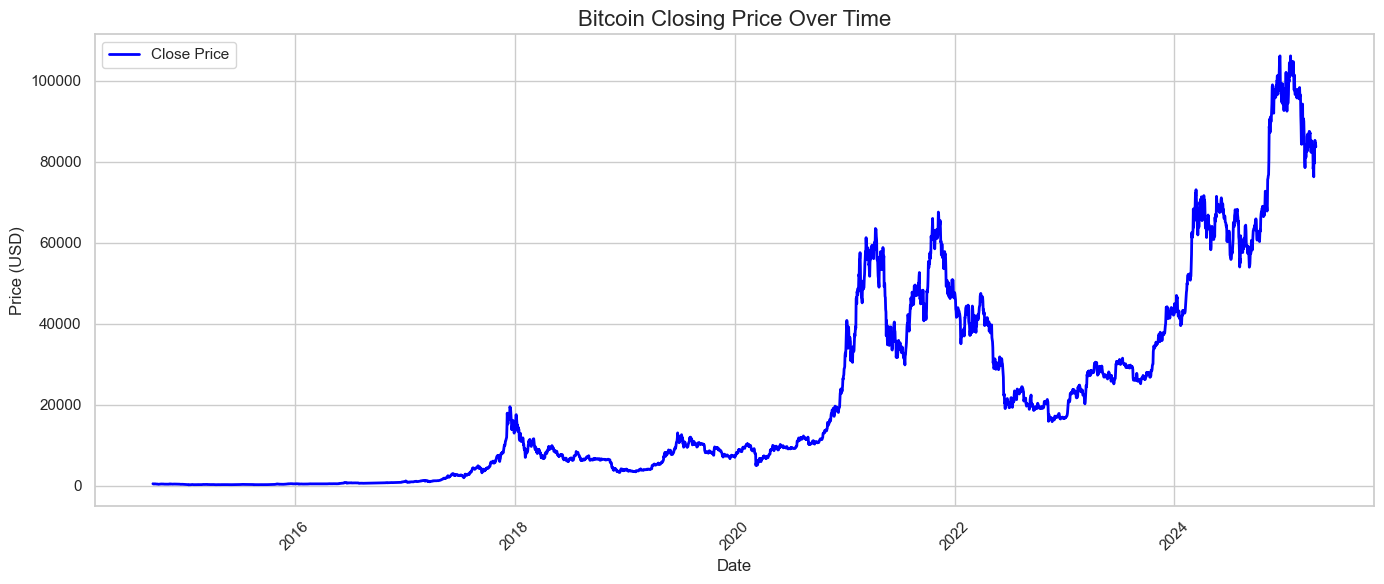

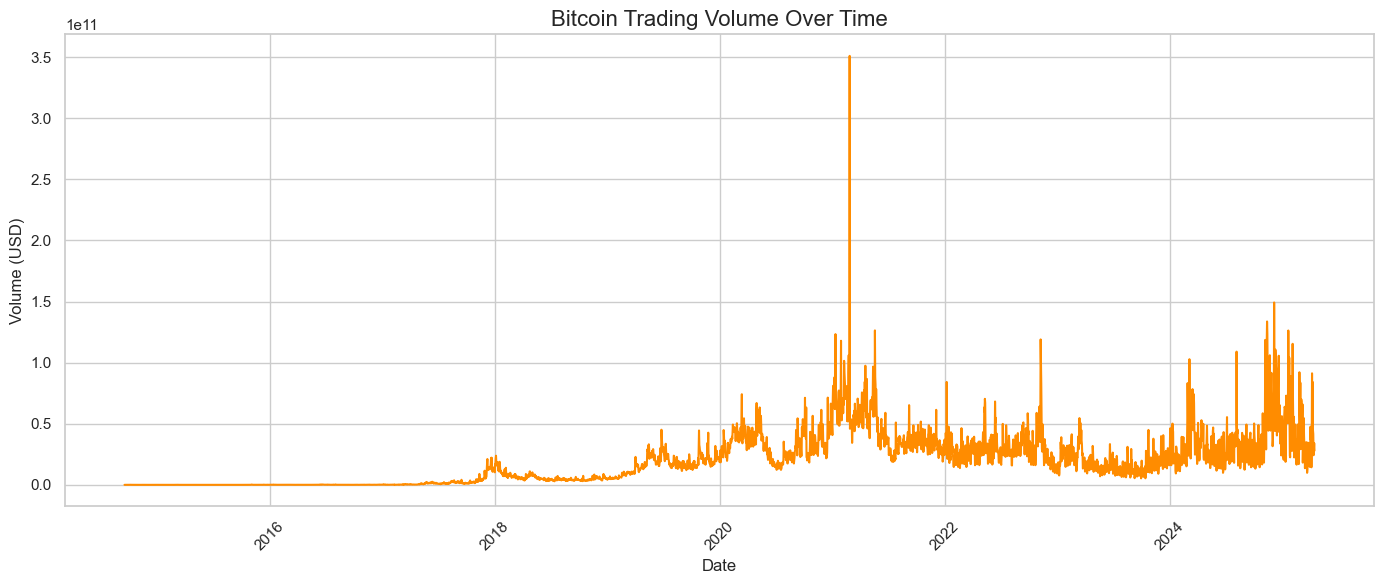

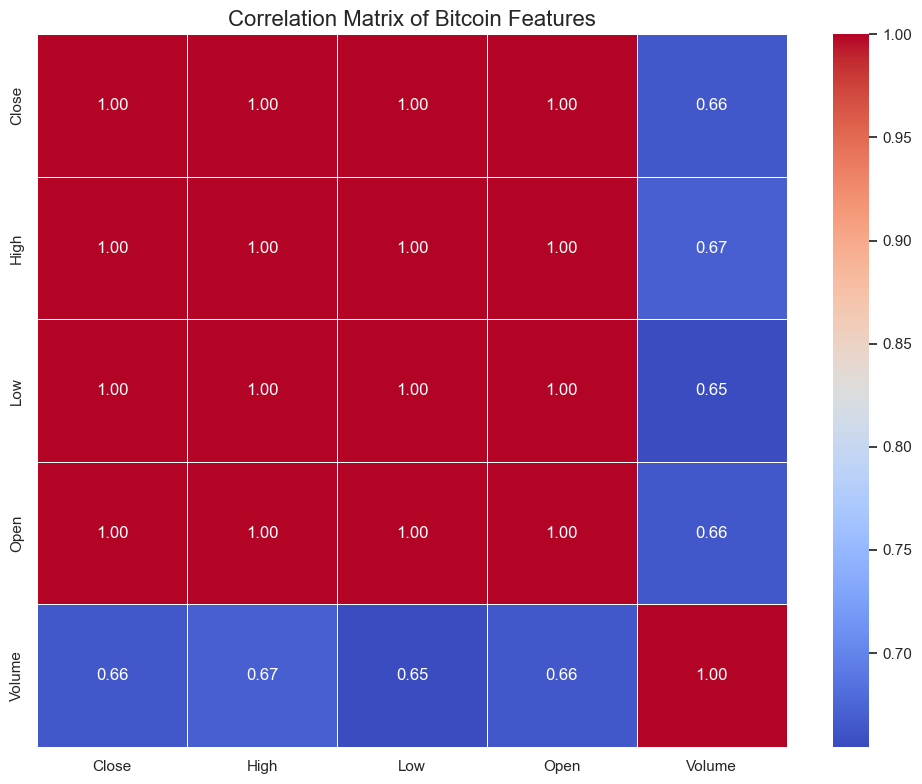

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set Seaborn style
sns.set(style='whitegrid')

# Define the file path
bitcoin_csv = os.path.join("data", "Bitcoin_data.csv")

# Load and prepare data
btc_data = pd.read_csv(bitcoin_csv, parse_dates=['Date'], index_col='Date')

# --- Basic Data Overview ---
print("Bitcoin Data (First 5 Rows):")
print(btc_data.head())

print("\nBitcoin Data Summary Statistics:")
print(btc_data.describe())

print("\nMissing Values in Bitcoin Data:")
print(btc_data.isnull().sum())

# --- Formatting helper for large values ---


def billions(x, pos):
    return f'{x * 1e-9:.1f}B'


def millions(x, pos):
    return f'{x * 1e-6:.1f}M'


# --- Visualization 1: Closing Price Over Time ---
plt.figure(figsize=(14, 6))
plt.plot(btc_data.index, btc_data['Close'],
         label='Close Price', color='blue', linewidth=2)
plt.title("Bitcoin Closing Price Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Visualization 2: Trading Volume Over Time ---
plt.figure(figsize=(14, 6))
plt.plot(btc_data.index, btc_data['Volume'], color='darkorange', linewidth=1.5)
plt.title("Bitcoin Trading Volume Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Visualization 3: Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(btc_data.corr(), annot=True,
            cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix of Bitcoin Features", fontsize=16)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Bitcoin CSV file; ensure that 'Date' is parsed and set as index.
data = pd.read_csv('data/Bitcoin_data.csv',
                   parse_dates=['Date'], index_col='Date')
# Focus on the closing price. You can expand this later if desired.
close_prices = data[['Close']].copy()

# Check for and drop any missing values.
close_prices = close_prices.dropna()

# Scale the 'Close' prices between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Define the window size (number of previous days to use as features).
window_size = 30

# Function to create sequences from the scaled data.


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


X, y = create_sequences(scaled_data, window_size)

# Perform a chronological split (e.g., 80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (3067, 30), (3067,)
Test data shape: (767, 30), (767,)


Linear Regression Mean Squared Error: 0.00024235482613314694
Linear Regression R2 Score: 0.9954273630017944


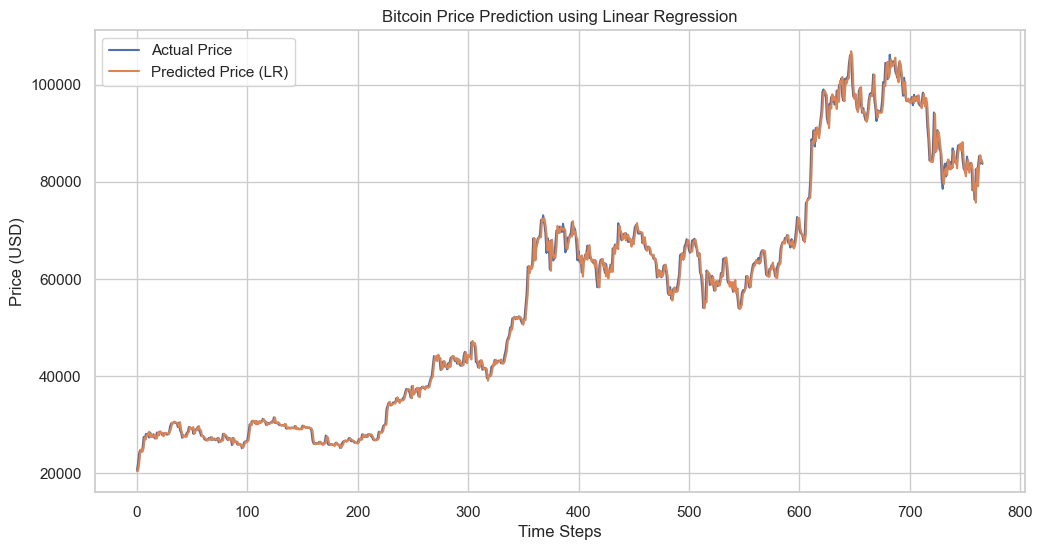

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train a Linear Regression model.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_lr = lr_model.predict(X_test)

# Compute the Mean Squared Error (MSE) for evaluation.
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# Compute the R2 score.
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Score:", r2)

# Reverse the scaling for visualization purposes.
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_lr_rescaled = scaler.inverse_transform(y_pred_lr.reshape(-1, 1))

# Plot the actual vs. predicted prices.
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_lr_rescaled, label='Predicted Price (LR)')
plt.title("Bitcoin Price Prediction using Linear Regression")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Random Forest Mean Squared Error: 0.016020296974880614
Random Forest R2 Score: 0.6977365632102728


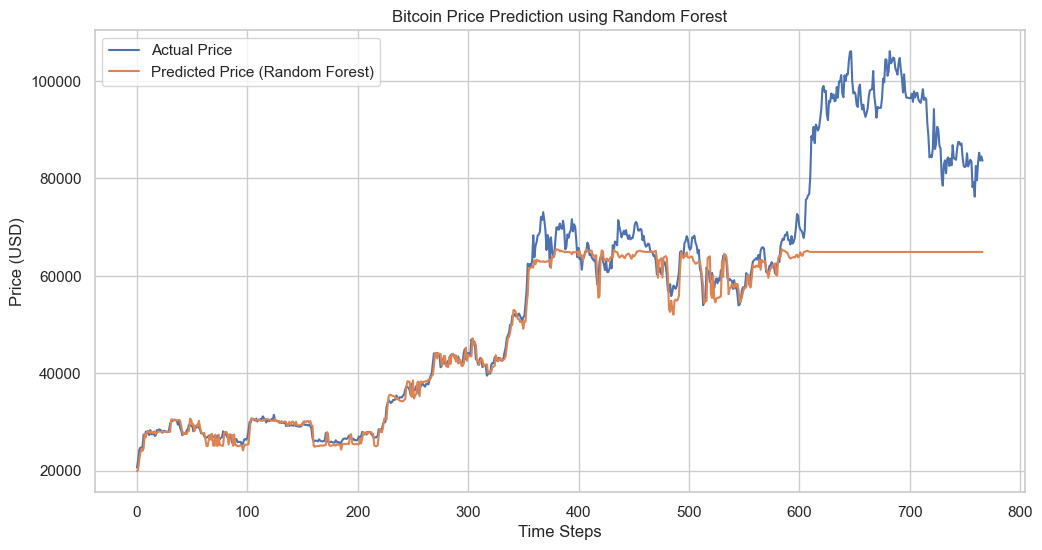

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest Regressor.
# Here, we use 100 trees and set a random state for reproducibility.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_rf = rf_model.predict(X_test)

# Compute evaluation metrics: Mean Squared Error and R² score.
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R2 Score:", r2_rf)

# Reverse the scaling for visualization purposes.
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rf_rescaled = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))

# Plot the actual vs. predicted prices.

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rf_rescaled, label='Predicted Price (Random Forest)')
plt.title("Bitcoin Price Prediction using Random Forest")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

c:\Users\spandan\code\crypto\crypto_backend\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-17 02:11:50,963] A new study created in memory with name: no-name-b4c7293b-7ab1-4e28-8c87-099ab9bc7b52
[I 2025-04-17 02:11:51,270] Trial 0 finished with value: 0.041511040930608915 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.021400578008209346, 'gamma': 0.734422092094556, 'min_child_weight': 3, 'subsample': 0.844138157577146, 'colsample_bytree': 0.5631733518050207}. Best is trial 0 with value: 0.041511040930608915.
[I 2025-04-17 02:11:51,388] Trial 1 finished with value: 0.03967661336181974 and parameters: {'n_estimators': 278, 'max_depth': 4, 'learning_rate': 0.08755596447180408, 'gamma': 0.6585099191101423, 'min_child_weight': 1, 'subsample': 0.8675866580364195, 'colsample_byt

Best trial:
  MSE: 0.018099
  Best Parameters:
    n_estimators: 116
    max_depth: 7
    learning_rate: 0.05699295370469537
    gamma: 0.0019824926516431403
    min_child_weight: 7
    subsample: 0.7344576679959319
    colsample_bytree: 0.6666109444752826
Tuned XGBoost Mean Squared Error: 0.01809890378086166
Tuned XGBoost R2 Score: 0.6585183865500345


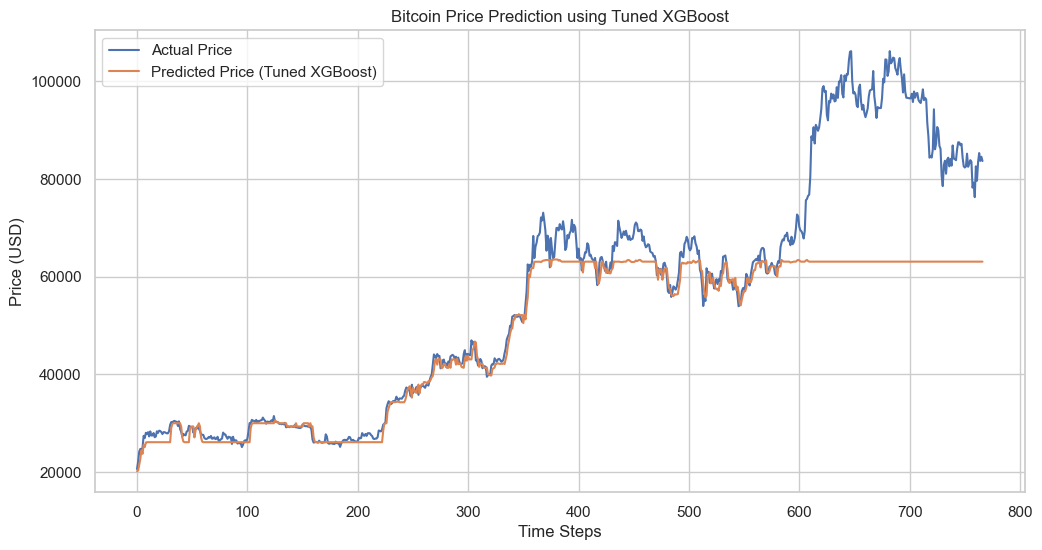

In [6]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the objective function for tuning.


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "random_state": 42,
    }

    # Create and initialize the model.
    model = XGBRegressor(**params)

    # Try to use early stopping if supported; otherwise, train without it.
    try:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                  early_stopping_rounds=10, verbose=False)
    except TypeError:
        # If the early_stopping_rounds argument is not supported, fall back.
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Make predictions on the test set.
    y_pred = model.predict(X_test)
    # Compute Mean Squared Error.
    mse = mean_squared_error(y_test, y_pred)
    return mse


# Create the Optuna study and optimize the objective.
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("  MSE: {:.6f}".format(trial.value))
print("  Best Parameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Retrain the XGBoost model using the best hyperparameters.
best_params = trial.params.copy()
best_params["random_state"] = 42
xgb_best = XGBRegressor(**best_params)
try:
    xgb_best.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                 early_stopping_rounds=10, verbose=False)
except TypeError:
    xgb_best.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions with the tuned model.
y_pred_xgb = xgb_best.predict(X_test)

# Compute evaluation metrics.
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Tuned XGBoost Mean Squared Error:", mse_xgb)
print("Tuned XGBoost R2 Score:", r2_xgb)

# Reverse scaling for visualization (using your fitted scaler).
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_xgb_rescaled = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Plot the actual vs. predicted prices.
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(y_pred_xgb_rescaled, label="Predicted Price (Tuned XGBoost)")
plt.title("Bitcoin Price Prediction using Tuned XGBoost")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Epoch [1/40], Loss: 0.007965
Epoch [2/40], Loss: 0.000416
Epoch [3/40], Loss: 0.000427
Epoch [4/40], Loss: 0.000387
Epoch [5/40], Loss: 0.000359
Epoch [6/40], Loss: 0.000430
Epoch [7/40], Loss: 0.000327
Epoch [8/40], Loss: 0.000328
Epoch [9/40], Loss: 0.000288
Epoch [10/40], Loss: 0.000288
Epoch [11/40], Loss: 0.000273
Epoch [12/40], Loss: 0.000286
Epoch [13/40], Loss: 0.000228
Epoch [14/40], Loss: 0.000261
Epoch [15/40], Loss: 0.000216
Epoch [16/40], Loss: 0.000231
Epoch [17/40], Loss: 0.000222
Epoch [18/40], Loss: 0.000210
Epoch [19/40], Loss: 0.000214
Epoch [20/40], Loss: 0.000186
Epoch [21/40], Loss: 0.000221
Epoch [22/40], Loss: 0.000184
Epoch [23/40], Loss: 0.000194
Epoch [24/40], Loss: 0.000200
Epoch [25/40], Loss: 0.000188
Epoch [26/40], Loss: 0.000183
Epoch [27/40], Loss: 0.000179
Epoch [28/40], Loss: 0.000176
Epoch [29/40], Loss: 0.000180
Epoch [30/40], Loss: 0.000190
Epoch [31/40], Loss: 0.000151
Epoch [32/40], Loss: 0.000154
Epoch [33/40], Loss: 0.000175
Epoch [34/40], Loss

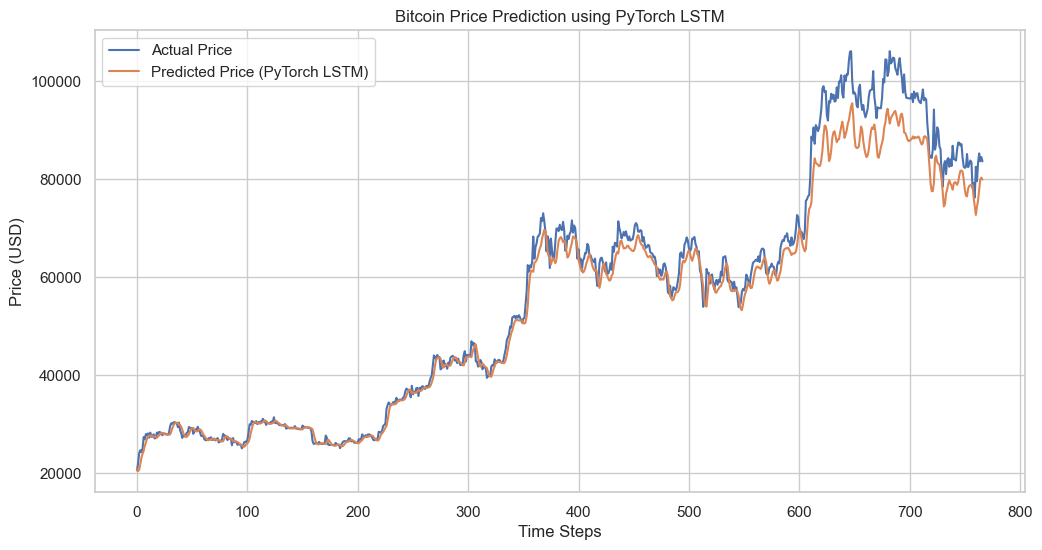

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Convert Data to PyTorch Tensors ---
# Add an extra dimension to X data to represent the single feature per time step.
X_train_tensor = torch.from_numpy(X_train).float(
).unsqueeze(-1)  # Shape: (samples, window_size, 1)
X_test_tensor = torch.from_numpy(X_test).float().unsqueeze(-1)
y_train_tensor = torch.from_numpy(
    y_train).float().unsqueeze(-1)  # Shape: (samples, 1)
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(-1)

# Create Datasets and DataLoaders
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Define the LSTM Model ---


class LSTMRegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer: batch_first=True expects input shape (batch, seq_length, features)
        self.lstm = nn.LSTM(input_size, hidden_size,
                            num_layers, batch_first=True, dropout=dropout)
        # Fully connected (output) layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state with zeros
        h0 = torch.zeros(self.num_layers, x.size(
            0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(
            0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        # out shape: (batch_size, seq_length, hidden_size)
        out, _ = self.lstm(x, (h0, c0))

        # Use the output from the last time step for prediction
        out = out[:, -1, :]  # shape: (batch_size, hidden_size)
        out = self.fc(out)   # shape: (batch_size, output_size)
        return out


# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMRegressor().to(device)

# --- Define Loss Function and Optimizer ---
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training the Model ---
num_epochs = 40
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_losses = []

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    avg_loss = np.mean(epoch_losses)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")
lstm_model = model
torch.save(lstm_model.state_dict(), "saved_models/lstm_model.pth")
print("LSTM model saved to 'saved_models/lstm_model.pth'")
# --- Evaluating the Model ---
model.eval()
with torch.no_grad():
    # For the entire test set
    predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Calculate evaluation metrics on the test set
mse_pytorch = mean_squared_error(y_test, predictions)
r2_pytorch = r2_score(y_test, predictions)
print(f"PyTorch LSTM Mean Squared Error: {mse_pytorch:.6f}")
print(f"PyTorch LSTM R2 Score: {r2_pytorch:.6f}")

# Reverse the scaling for visualization purposes using your scaler.
# (Ensure that 'scaler' was fitted on the same feature as used here.)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_rescaled = scaler.inverse_transform(predictions)

# Plotting the Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(lstm_predictions_rescaled, label="Predicted Price (PyTorch LSTM)")
plt.title("Bitcoin Price Prediction using PyTorch LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Epoch [1/40], Loss: 0.008020
Epoch [2/40], Loss: 0.000256
Epoch [3/40], Loss: 0.000264
Epoch [4/40], Loss: 0.000244
Epoch [5/40], Loss: 0.000246
Epoch [6/40], Loss: 0.000169
Epoch [7/40], Loss: 0.000169
Epoch [8/40], Loss: 0.000188
Epoch [9/40], Loss: 0.000189
Epoch [10/40], Loss: 0.000162
Epoch [11/40], Loss: 0.000153
Epoch [12/40], Loss: 0.000137
Epoch [13/40], Loss: 0.000143
Epoch [14/40], Loss: 0.000145
Epoch [15/40], Loss: 0.000130
Epoch [16/40], Loss: 0.000132
Epoch [17/40], Loss: 0.000125
Epoch [18/40], Loss: 0.000161
Epoch [19/40], Loss: 0.000134
Epoch [20/40], Loss: 0.000115
Epoch [21/40], Loss: 0.000105
Epoch [22/40], Loss: 0.000117
Epoch [23/40], Loss: 0.000126
Epoch [24/40], Loss: 0.000119
Epoch [25/40], Loss: 0.000106
Epoch [26/40], Loss: 0.000118
Epoch [27/40], Loss: 0.000106
Epoch [28/40], Loss: 0.000112
Epoch [29/40], Loss: 0.000109
Epoch [30/40], Loss: 0.000107
Epoch [31/40], Loss: 0.000110
Epoch [32/40], Loss: 0.000116
Epoch [33/40], Loss: 0.000102
Epoch [34/40], Loss

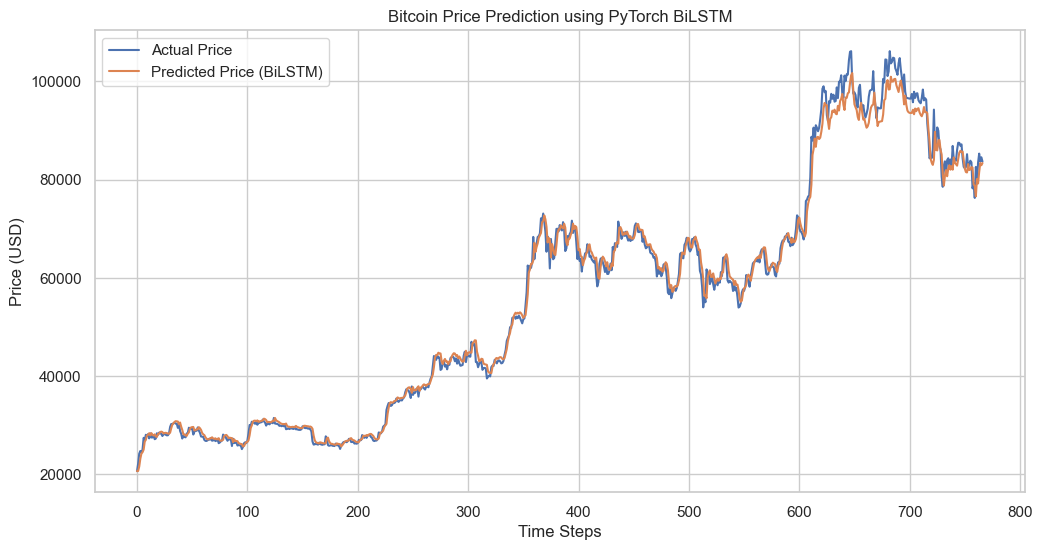

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Convert Data to PyTorch Tensors ---
# Add an extra dimension for the single feature per time step.
X_train_tensor = torch.from_numpy(X_train).float(
).unsqueeze(-1)  # shape: (samples, window_size, 1)
X_test_tensor = torch.from_numpy(X_test).float().unsqueeze(-1)
y_train_tensor = torch.from_numpy(
    y_train).float().unsqueeze(-1)  # shape: (samples, 1)
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(-1)

# Create Datasets and DataLoaders.
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Define the BiLSTM Model ---


class BiLSTMRegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(BiLSTMRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Setting bidirectional=True to enable BiLSTM.
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout, bidirectional=True)
        # The fully connected layer now gets hidden_size*2 due to bidirectionality.
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state with zeros.
        # For bidirectional LSTM, the shape is (num_layers * num_directions, batch_size, hidden_size).
        num_directions = 2
        h0 = torch.zeros(self.num_layers * num_directions,
                         x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * num_directions,
                         x.size(0), self.hidden_size).to(x.device)

        # Forward propagate through the BiLSTM.
        # out shape: (batch, seq_len, hidden_size * 2)
        out, _ = self.lstm(x, (h0, c0))
        # Use the output from the last time step.
        out = out[:, -1, :]  # shape: (batch, hidden_size * 2)
        out = self.fc(out)   # shape: (batch, output_size)
        return out


# Set the device (GPU if available, otherwise CPU).
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMRegressor().to(device)

# --- Define Loss Function and Optimizer ---
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training the BiLSTM Model ---
num_epochs = 40
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    avg_loss = np.mean(epoch_losses)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")
bilstm_model = model
torch.save(bilstm_model.state_dict(), "saved_models/bilstm_model.pth")
print("BiLSTM model saved to 'saved_models/bilstm_model.pth'")
# --- Evaluating the BiLSTM Model ---
model.eval()
with torch.no_grad():
    # Predict for the entire test set.
    predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Compute evaluation metrics on the test set.
mse_bilstm = mean_squared_error(y_test, predictions)
r2_bilstm = r2_score(y_test, predictions)
print(f"BiLSTM Mean Squared Error: {mse_bilstm:.6f}")
print(f"BiLSTM R2 Score: {r2_bilstm:.6f}")

# Reverse the scaling for visualization (using the pre-fitted scaler).
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
bilstm_predictions_rescaled = scaler.inverse_transform(predictions)

# Plot Actual vs. Predicted Prices.
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(bilstm_predictions_rescaled, label="Predicted Price (BiLSTM)")
plt.title("Bitcoin Price Prediction using PyTorch BiLSTM")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Epoch [1/40], Loss: 0.006429
Epoch [2/40], Loss: 0.000240
Epoch [3/40], Loss: 0.000213
Epoch [4/40], Loss: 0.000194
Epoch [5/40], Loss: 0.000160
Epoch [6/40], Loss: 0.000160
Epoch [7/40], Loss: 0.000134
Epoch [8/40], Loss: 0.000139
Epoch [9/40], Loss: 0.000135
Epoch [10/40], Loss: 0.000145
Epoch [11/40], Loss: 0.000133
Epoch [12/40], Loss: 0.000126
Epoch [13/40], Loss: 0.000127
Epoch [14/40], Loss: 0.000127
Epoch [15/40], Loss: 0.000125
Epoch [16/40], Loss: 0.000117
Epoch [17/40], Loss: 0.000108
Epoch [18/40], Loss: 0.000109
Epoch [19/40], Loss: 0.000115
Epoch [20/40], Loss: 0.000124
Epoch [21/40], Loss: 0.000106
Epoch [22/40], Loss: 0.000105
Epoch [23/40], Loss: 0.000114
Epoch [24/40], Loss: 0.000107
Epoch [25/40], Loss: 0.000120
Epoch [26/40], Loss: 0.000106
Epoch [27/40], Loss: 0.000091
Epoch [28/40], Loss: 0.000096
Epoch [29/40], Loss: 0.000108
Epoch [30/40], Loss: 0.000122
Epoch [31/40], Loss: 0.000105
Epoch [32/40], Loss: 0.000097
Epoch [33/40], Loss: 0.000103
Epoch [34/40], Loss

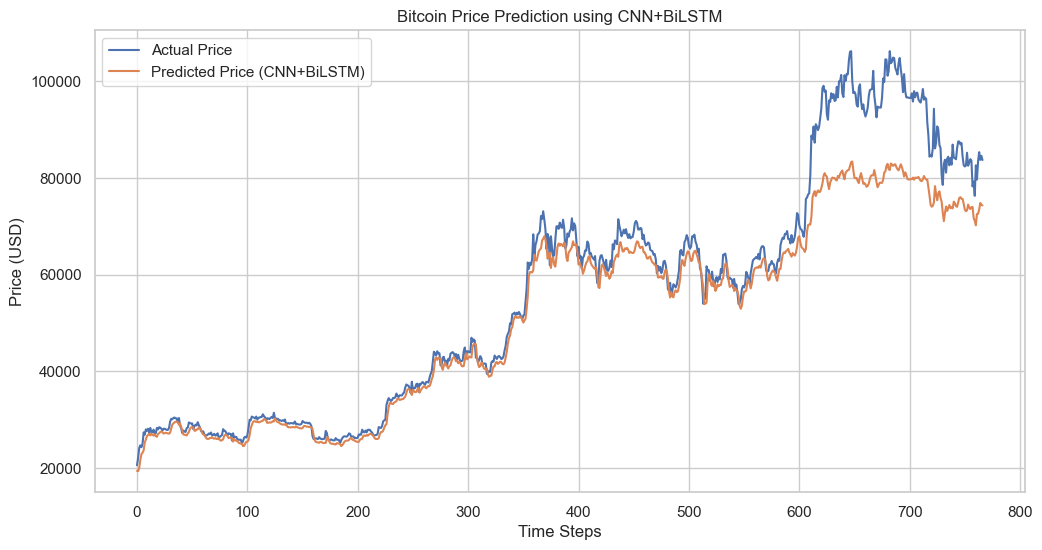

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Convert Data to PyTorch Tensors ---
# The input shape expected is (samples, sequence_length, features).
# Here we have 1 feature per time step.
X_train_tensor = torch.from_numpy(X_train).float(
).unsqueeze(-1)  # Shape: (samples, window_size, 1)
X_test_tensor = torch.from_numpy(X_test).float().unsqueeze(-1)
y_train_tensor = torch.from_numpy(
    y_train).float().unsqueeze(-1)  # Shape: (samples, 1)
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(-1)

# Create Datasets and DataLoaders for training and evaluation.
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Define the CNN+BiLSTM Model ---


class CNN_BiLSTM(nn.Module):
    def __init__(self, cnn_out_channels=64, kernel_size=3, hidden_size=50, num_layers=2, dropout=0.2):
        super(CNN_BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # 1D Convolution layer.
        # Input shape to Conv1d should be (batch, in_channels, sequence_length).
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels,
                             kernel_size=kernel_size, padding=kernel_size//2)
        self.relu = nn.ReLU()

        # Bidirectional LSTM layer.
        # The input size for the LSTM is set to cnn_out_channels.
        self.bilstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=hidden_size,
                              num_layers=num_layers, batch_first=True,
                              dropout=dropout, bidirectional=True)

        # Fully connected layer to map the last time step output to our prediction.
        # Multiply by 2 for bidirectionality.
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        # Input x shape: (batch, seq_len, 1)
        # Permute to (batch, 1, seq_len) for the CNN layer.
        x = x.permute(0, 2, 1)
        x = self.cnn(x)  # Now shape: (batch, cnn_out_channels, seq_len)
        x = self.relu(x)
        # Permute back to (batch, seq_len, cnn_out_channels) for the LSTM.
        x = x.permute(0, 2, 1)

        batch_size = x.size(0)
        num_directions = 2  # Because our LSTM is bidirectional.
        h0 = torch.zeros(self.num_layers * num_directions,
                         batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * num_directions,
                         batch_size, self.hidden_size).to(x.device)

        # Forward propagate through the BiLSTM.
        # out shape: (batch, seq_len, hidden_size * 2)
        out, _ = self.bilstm(x, (h0, c0))
        # Use the output from the last time step.
        out = out[:, -1, :]  # Shape: (batch, hidden_size * 2)
        out = self.fc(out)   # Shape: (batch, 1)
        return out


# --- Model, Loss, Optimizer Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_BiLSTM().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training Loop ---
num_epochs = 40
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    avg_loss = np.mean(epoch_losses)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")
cnn_bilstm_model = model
torch.save(cnn_bilstm_model.state_dict(), "saved_models/cnn_bilstm_model.pth")
print("CNN+BiLSTM model saved to 'saved_models/cnn_bilstm_model.pth'")
# --- Evaluation ---
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Compute evaluation metrics.
mse_cnn_bilstm = mean_squared_error(y_test, predictions)
r2_cnn_bilstm = r2_score(y_test, predictions)
print(f"CNN+BiLSTM Mean Squared Error: {mse_cnn_bilstm:.6f}")
print(f"CNN+BiLSTM R2 Score: {r2_cnn_bilstm:.6f}")

# Reverse the scaling for visualization using the fitted scaler.
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
cnn_bilstm_predictions_rescaled = scaler.inverse_transform(predictions)

# Plot Actual vs. Predicted Prices.
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(cnn_bilstm_predictions_rescaled, label="Predicted Price (CNN+BiLSTM)")
plt.title("Bitcoin Price Prediction using CNN+BiLSTM")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Epoch [1/40], Loss: 0.004915
Epoch [2/40], Loss: 0.000464
Epoch [3/40], Loss: 0.000333
Epoch [4/40], Loss: 0.000305
Epoch [5/40], Loss: 0.000261
Epoch [6/40], Loss: 0.000228
Epoch [7/40], Loss: 0.000253
Epoch [8/40], Loss: 0.000229
Epoch [9/40], Loss: 0.000212
Epoch [10/40], Loss: 0.000204
Epoch [11/40], Loss: 0.000221
Epoch [12/40], Loss: 0.000194
Epoch [13/40], Loss: 0.000197
Epoch [14/40], Loss: 0.000184
Epoch [15/40], Loss: 0.000165
Epoch [16/40], Loss: 0.000181
Epoch [17/40], Loss: 0.000177
Epoch [18/40], Loss: 0.000175
Epoch [19/40], Loss: 0.000161
Epoch [20/40], Loss: 0.000166
Epoch [21/40], Loss: 0.000163
Epoch [22/40], Loss: 0.000149
Epoch [23/40], Loss: 0.000166
Epoch [24/40], Loss: 0.000183
Epoch [25/40], Loss: 0.000171
Epoch [26/40], Loss: 0.000146
Epoch [27/40], Loss: 0.000158
Epoch [28/40], Loss: 0.000151
Epoch [29/40], Loss: 0.000161
Epoch [30/40], Loss: 0.000141
Epoch [31/40], Loss: 0.000134
Epoch [32/40], Loss: 0.000148
Epoch [33/40], Loss: 0.000150
Epoch [34/40], Loss

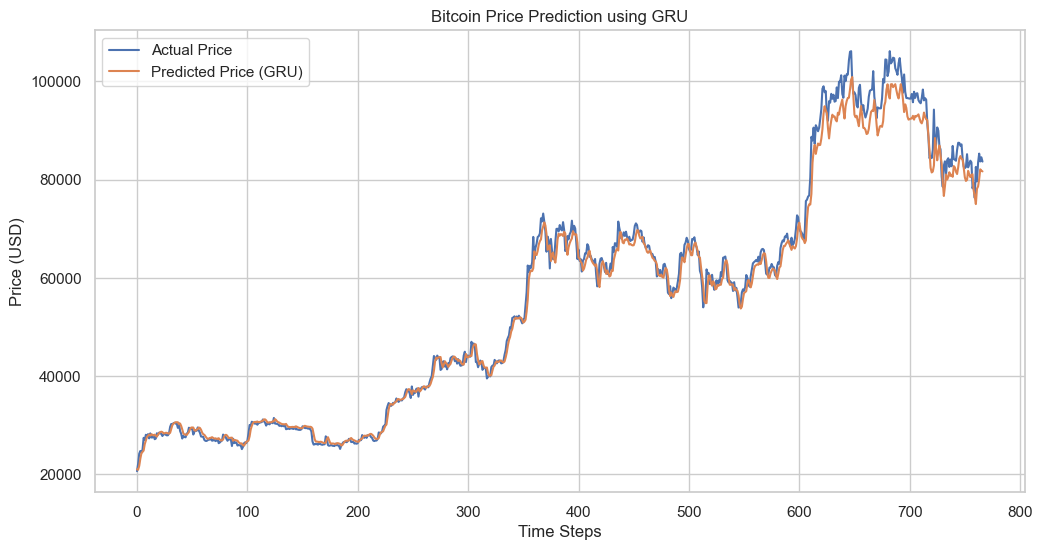

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# ------------------------------
# Data Loading and Preprocessing
# ------------------------------

# Load Bitcoin data (assumes CSV file exists in the specified folder)
data = pd.read_csv('data/Bitcoin_data.csv',
                   parse_dates=['Date'], index_col='Date')
close_prices = data[['Close']].copy()

# Drop any missing values
close_prices.dropna(inplace=True)

# Scale the close prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# ------------------------------
# Sequence Creation for Time-Series Forecasting
# ------------------------------

window_size = 30  # Number of past days used as features


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


X, y = create_sequences(scaled_data, window_size)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ------------------------------
# Convert Data to PyTorch Tensors and Create DataLoaders
# ------------------------------

# Reshape X to add the feature dimension (samples, sequence_length, features)
X_train_tensor = torch.from_numpy(X_train).float().unsqueeze(-1)
X_test_tensor = torch.from_numpy(X_test).float().unsqueeze(-1)
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(-1)
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(-1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ------------------------------
# Define the GRU Model
# ------------------------------


class GRURegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(GRURegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layer: batch_first=True so that input shape is (batch, seq_length, features)
        self.gru = nn.GRU(input_size, hidden_size, num_layers,
                          batch_first=True, dropout=dropout)
        # Fully connected layer for mapping the last time step's output to prediction
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(
            0), self.hidden_size).to(x.device)

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)
        # Use the output of the last time step for prediction
        out = out[:, -1, :]
        out = self.fc(out)
        return out


# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRURegressor().to(device)

# ------------------------------
# Loss Function and Optimizer Setup
# ------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Training the GRU Model
# ------------------------------

num_epochs = 40
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_losses = []

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()         # Zero gradients from previous iteration
        outputs = model(X_batch)        # Forward pass
        loss = criterion(outputs, y_batch)
        loss.backward()                 # Backward pass (compute gradients)
        optimizer.step()                # Update model parameters

        epoch_losses.append(loss.item())

    avg_loss = np.mean(epoch_losses)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")
gru_model = model
torch.save(gru_model.state_dict(), "saved_models/gru_model.pth")
print("GRU model saved to 'saved_models/gru_model.pth'")
# ------------------------------
# Evaluating the GRU Model
# ------------------------------

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Compute evaluation metrics
mse_gru = mean_squared_error(y_test, predictions)
r2_gru = r2_score(y_test, predictions)
print(f"\nGRU Mean Squared Error: {mse_gru:.6f}")
print(f"GRU R2 Score: {r2_gru:.6f}")

# Reverse the scaling of predictions and test targets for visualization
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
gru_predictions_rescaled = scaler.inverse_transform(predictions)

# ------------------------------
# Visualization of Actual vs. Predicted Prices
# ------------------------------

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(gru_predictions_rescaled, label="Predicted Price (GRU)")
plt.title("Bitcoin Price Prediction using GRU")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

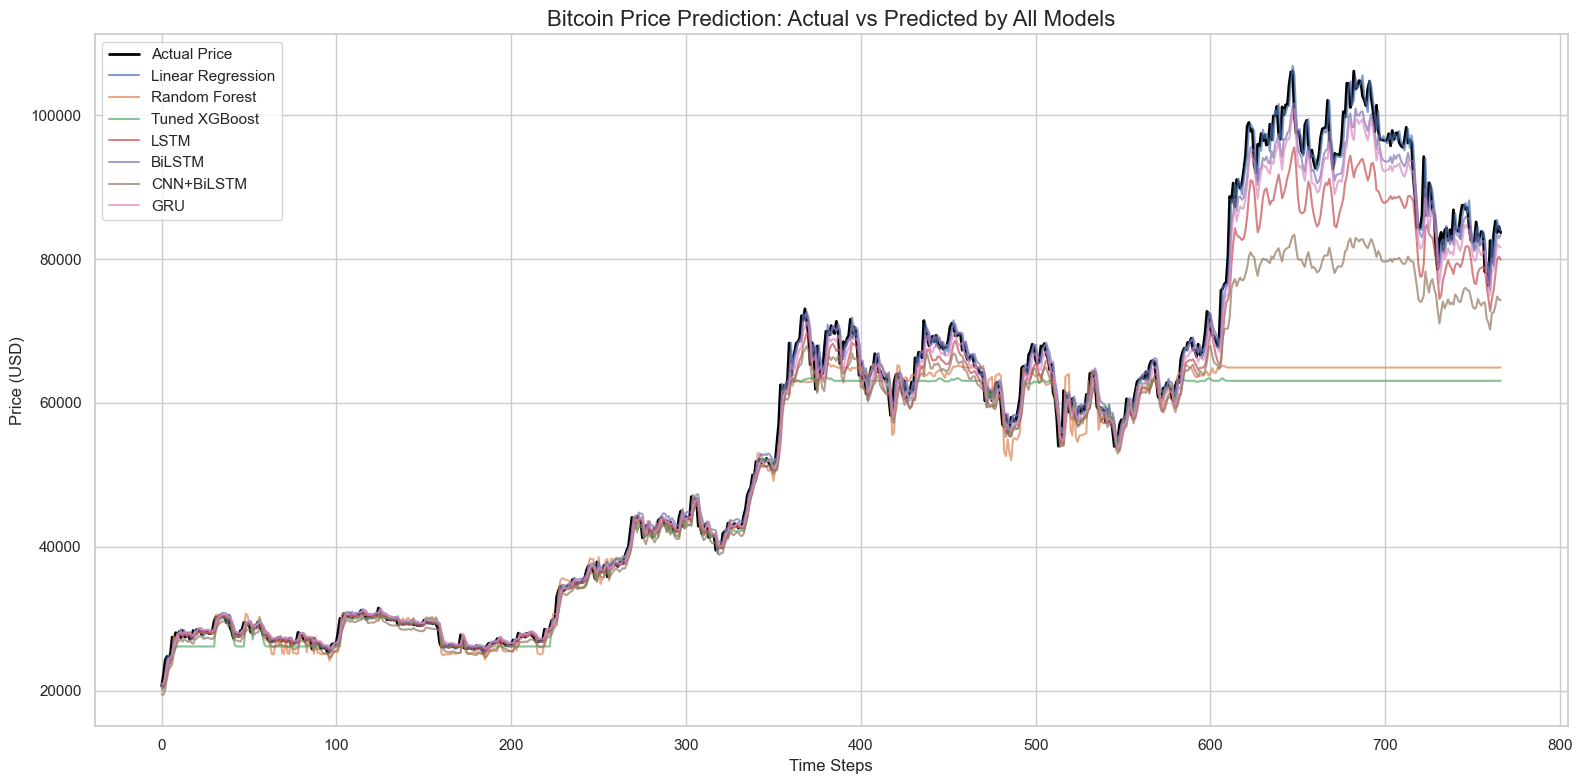


--- Model Evaluation Metrics ---
            Model          MSE  R2 Score
Linear Regression 2.721463e+06  0.995427
           BiLSTM 4.173392e+06  0.992988
              GRU 6.149308e+06  0.989668
             LSTM 1.717528e+07  0.971142
       CNN+BiLSTM 5.469927e+07  0.908094
    Random Forest 1.798959e+08  0.697737
    Tuned XGBoost 2.032371e+08  0.658518


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assign actual prices
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Store model predictions (rescaled to original price range)
model_predictions = {
    "Linear Regression": y_pred_lr_rescaled,
    "Random Forest": y_pred_rf_rescaled,
    "Tuned XGBoost": y_pred_xgb_rescaled,
    "LSTM": lstm_predictions_rescaled,
    "BiLSTM": bilstm_predictions_rescaled,
    "CNN+BiLSTM": cnn_bilstm_predictions_rescaled,
    "GRU": gru_predictions_rescaled,
}

# --- Plot all predictions ---
plt.figure(figsize=(16, 8))
plt.plot(y_test_rescaled, label='Actual Price', color='black', linewidth=2)

for name, pred in model_predictions.items():
    plt.plot(pred, label=f'{name}', alpha=0.7)

plt.title("Bitcoin Price Prediction: Actual vs Predicted by All Models", fontsize=16)
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluate and compare metrics ---
metrics = []
for name, pred in model_predictions.items():
    mse = mean_squared_error(y_test_rescaled, pred)
    r2 = r2_score(y_test_rescaled, pred)
    metrics.append({"Model": name, "MSE": mse, "R2 Score": r2})

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by="MSE")

# Display metrics
print("\n--- Model Evaluation Metrics ---")
print(metrics_df.to_string(index=False))

In [12]:
import os
import joblib
os.makedirs("saved_models", exist_ok=True)

joblib.dump(scaler, "saved_models/minmax_scaler.joblib")

joblib.dump(lr_model,   "saved_models/linear_regression.joblib")
joblib.dump(rf_model,   "saved_models/random_forest.joblib")
xgb_best.save_model("saved_models/xgb_best.json")
